In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial 
from p_tqdm import p_map

In [26]:
path_to_dataset = '/home/sathvik/GitProjects/AMATH-482/Homework Assignments/Homework 4/house-votes-84.data'

data = (np.genfromtxt(path_to_dataset, delimiter=',', dtype=object, unpack=True)).T
print(data)

[[b'republican' b'n' b'y' ... b'y' b'n' b'y']
 [b'republican' b'n' b'y' ... b'y' b'n' b'?']
 [b'democrat' b'?' b'y' ... b'y' b'n' b'n']
 ...
 [b'republican' b'n' b'?' ... b'y' b'n' b'y']
 [b'republican' b'n' b'n' ... b'y' b'n' b'y']
 [b'republican' b'n' b'y' ... b'y' b'?' b'n']]


In [27]:
Y = data[:, 0]
Y = [1 if i == b'democrat' else -1 for i in Y]
print(Y)

[-1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1,

In [28]:
X = data[:, 1:]
for index, column in enumerate(X): 
    new_column = []
    for i in column:
        encoded_val = 0
        if i == b'y':
            encoded_val = 1
        elif i == b'n':
            encoded_val = -1
        new_column.append(encoded_val)
    X[index] = new_column
print(X)

[[-1 1 -1 ... 1 -1 1]
 [-1 1 -1 ... 1 -1 0]
 [0 1 1 ... 1 -1 -1]
 ...
 [-1 0 -1 ... 1 -1 1]
 [-1 -1 -1 ... 1 -1 1]
 [-1 1 -1 ... 1 0 -1]]


In [29]:
# compute the weight matrix W for the vertices of our graph 
def eta(tt, rr):

 val = np.exp( - (tt**2)/(2*rr**2) ) 
  
 return val
  


dist = scipy.spatial.distance_matrix(X, X, p = 2)

def spectral_clustering(r):
    W = eta(dist, r)
    # compute Laplacian matrices 
    d = np.sum(W, axis=1) # degree vector

    D = np.diag(d)
    Ds = np.diag(1/np.sqrt(d))

    Ln = np.dot(Ds, np.dot((D - W),Ds)) # normalized
    # compute eigendecompositions 

    # we need to sort the eigenvalues and vectors 

    lln, VVn = np.linalg.eigh(Ln)

    idxn = lln.argsort()
    Vn = VVn[:, idxn]

    q1 = Vn[:, 1]
    q1 = np.sign(q1)
    num_incorrect = np.sum(q1 != Y)
    clustering_accuracy = 1 - (1/435) * num_incorrect
    return clustering_accuracy

/tmp/ipykernel_1636/3817873046.py:4: RuntimeWarning: divide by zero encountered in true_divide
  val = np.exp( - (tt**2)/(2*rr**2) )
/tmp/ipykernel_1636/3817873046.py:4: RuntimeWarning: invalid value encountered in true_divide
  val = np.exp( - (tt**2)/(2*rr**2) )
100%|██████████| 1000/1000 [02:12<00:00,  7.56it/s]


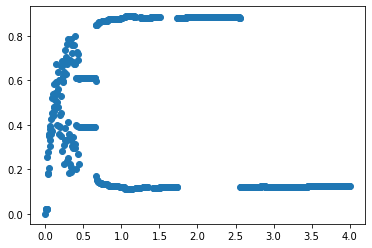

In [30]:
inputs = np.linspace(0, 4, 1000)
results = p_map(spectral_clustering, inputs)
fig, ax = plt.subplots()
ax.scatter(inputs, results)